### - Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

### - Carregando o arquivo

In [5]:
data = pd.read_csv("/home/quant/Documents/supermarket_sales.csv")

In [6]:
data.head(4)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4


### 1. Qual o Faturamento por filial?

In [7]:
data.groupby("City")["Total"].sum()

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

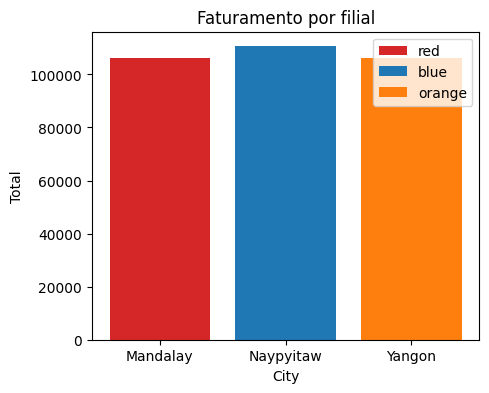

In [10]:
# Visualizar de forma de grafico os resultados
plt.rcParams["figure.figsize"] = (5,4)
fig, ax = plt.subplots()
dataindex = ["Mandalay", "Naypyitaw", "Yangon"]
bar_labels = ["red", "blue", "orange"]
bar_colors = ["tab:red", "tab:blue", "tab:orange"]

ax.bar(dataindex, data.groupby("City")["Total"].sum(), label=bar_labels, color=bar_colors)
ax.set_ylabel("Total")
ax.set_title("Faturamento por filial")
ax.set_xlabel("City")
ax.legend()
plt.show()

### 2. Qual o percentual de participação na receita de cada tipo de produto?

In [13]:
(data.groupby("Product line")["Total"].sum() / data["Total"].sum()).sort_values() * 100 

Product line
Health and beauty         15.231828
Home and lifestyle        16.677232
Fashion accessories       16.814702
Electronic accessories    16.824497
Sports and travel         17.067648
Food and beverages        17.384094
Name: Total, dtype: float64

#### vamos visualizar isso em um grafico de pizza

<AxesSubplot: ylabel='Total'>

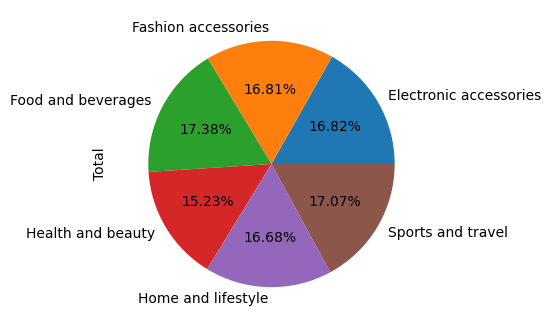

In [14]:
data2 = data.groupby("Product line")["Total"].sum()
data2.plot(x = "Product line", y = "Total", kind="pie", autopct="%1.2f%%")


### 3. Como está distribuído o tipo de produto consumido por gênero

In [16]:
data.groupby(["Product line", "Gender"])[["Total"]].sum().pivot_table(index="Product line", columns="Gender")

Total            
Gender                      Female        Male
Product line                                  
Electronic accessories  27102.0225  27235.5090
Fashion accessories     30437.4000  23868.4950
Food and beverages      33170.9175  22973.9265
Health and beauty       18560.9865  30632.7525
Home and lifestyle      30036.8775  23825.0355
Sports and travel       28574.7210  26548.1055

In [17]:
# Vamos visualizar esses resultados em um grafico de barras

data3 = data.groupby(["Product line", "Gender"])[["Total"]].sum().pivot_table(index="Product line", columns="Gender")
data3.columns = ["Female", "Male"]
data3.reset_index(inplace=True)

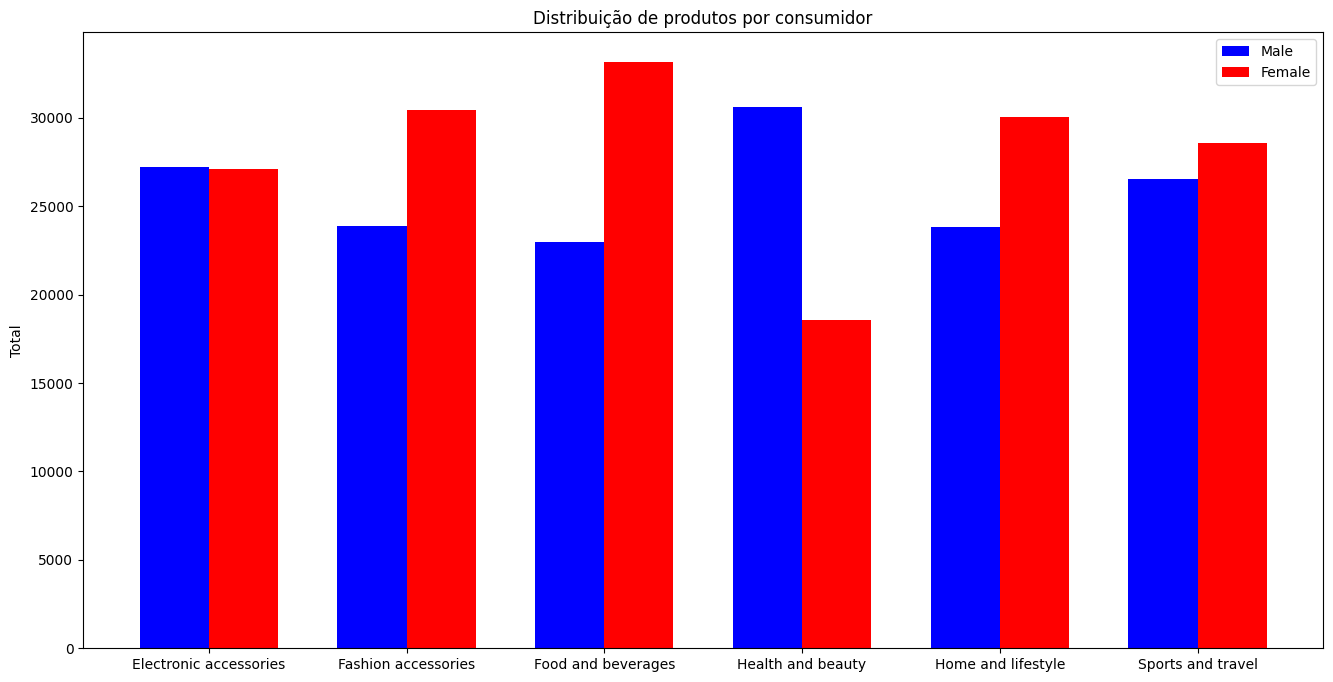

In [21]:
grupos = data3["Product line"]
x = np.arange(len(grupos))
largura = 0.35

fig, ax = plt.subplots()

plt.rcParams["figure.figsize"]=(16,8)
plt.xticks(rotation= 0)

ax.bar(x-largura/2, data3["Male"], largura, label="Male", color="blue")
ax.bar(x+largura/2, data3["Female"], largura, label="Female", color="red")

ax.set_ylabel("Total")
ax.set_title("Distribuição de produtos por consumidor")
ax.set_xticks(x, grupos)
ax.legend()
plt.show()

### 4. Qual o faturamento por mês

In [22]:
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = pd.to_datetime(data["Date"]).apply(lambda x: x.month)
data["Year"] = pd.to_datetime(data["Date"]).apply(lambda x: x.year)
data.groupby("Month")["Total"].sum()

Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

### 5. Qual foi a média de avaliação por filial em janeiro de 2019 

In [24]:
q = data[(data["Month"] == 1) & (data["Year"] == 2019)][["City", "Rating"]]
q.groupby("City")["Rating"].mean()

City
Mandalay     6.801802
Naypyitaw    7.154918
Yangon       7.078151
Name: Rating, dtype: float64

### 6. Como se distribui o gasto por consumidor em cada filial

In [27]:
data.groupby(["Customer type", "City"])[["Total"]].sum().pivot_table(index="Customer type", columns="City")

Total                        
City            Mandalay   Naypyitaw      Yangon
Customer type                                   
Member         53704.686  56881.2825  53637.4755
Normal         52492.986  53687.4240  52562.8950

### Obrigado por assistir e pela sua atenção